# Energy Graphing

A simple journal to explore and graph energy contributions

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})
#plt.rcParams['figure.figsize'] = (10, 6)

cwd = os.getcwd() #grabs current working directory

#testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / '')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')

#if not os.path.exists(testfolder):
#    os.makedirs(testfolder)

In [2]:
#creating scenarios for identical power and identical area deployed
MATERIALS = ['glass','silver','silicon', 'copper', 'aluminium_frames'] # 'encapsulant', 'backsheet', 
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [3]:
#load in a baseline and materials for modification
import PV_ICE

sim_anModule = PV_ICE.Simulation(name='sim_anModule', path=inputfolder)
sim_anModule.createScenario(name='PVICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim_anModule.scenario['PVICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP


In [4]:
#no circularity
sim_anModule.scenMod_noCircularity()

In [5]:
#create an area dataframe to feed in a module each year
idx_temp = pd.RangeIndex(start=1995,stop=2051,step=1) #create the index
area_deploy_anModule = pd.DataFrame(index=idx_temp, dtype=float) #create an empty DF
area_deploy_anModule['Area'] = 2.0
area_deploy_anModule.head()

,Area
1995,2.0
1996,2.0
1997,2.0
1998,2.0
1999,2.0


In [6]:
sim_anModule.calculateFlows(scenarios='PVICE', 
                            installByArea=list(area_deploy_anModule['Area']))


>>>> Calculating Material Flows <<<<

Working on Scenario:  PVICE
********************
Calculating installed capacity based on installed Area
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames


>>>> Calculating Energy Flows <<<<

Working on Scenario:  PVICE
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  aluminium_frames


In [7]:
anmodule_yearly, anmodule_cumu = sim_anModule.aggregateResults()
allenergy, energyGen, energy_demands = sim_anModule.aggregateEnergyResults()


In [8]:
energy_demands.head(3)

,PVICE_mod_MFG,PVICE_mod_Install,PVICE_mod_OandM,PVICE_mod_Repair,PVICE_mod_Demount,PVICE_mod_Store,PVICE_mod_Resell_Certify,PVICE_mod_ReMFG_Disassembly,PVICE_mod_Recycle_Crush,PVICE_glass_mat_extraction,...,PVICE_copper_mat_Recycled_HQ,PVICE_aluminium_frames_mat_extraction,PVICE_aluminium_frames_mat_MFG_virgin,PVICE_aluminium_frames_mat_MFGScrap_LQ,PVICE_aluminium_frames_mat_MFGScrap_HQ,PVICE_aluminium_frames_mat_Landfill,PVICE_aluminium_frames_mat_EoL_ReMFG_clean,PVICE_aluminium_frames_mat_Recycled_LQ,PVICE_aluminium_frames_mat_Recycled_HQ,PVICE_e_demand_total
year,,,,,,,,,,,,,,,,,,,,,
1995,17551.020408,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.586824,...,0.0,76741.247436,382335.857761,0.0,0.0,17.090413,0.0,0.0,0.0,3.334282e+06
1996,17755.102041,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.586824,...,0.0,74909.874065,377814.638227,0.0,0.0,16.684426,0.0,0.0,0.0,3.050983e+06
1997,17959.183673,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.586824,...,0.0,67029.744449,342189.239332,0.0,0.0,14.967337,0.0,0.0,0.0,2.814585e+06


Sum the Energy demands by material and by module

In [9]:
e_module_sum = energy_demands.filter(like='mod').sum(axis=1)

e_glass_sum = energy_demands.filter(like='glass').sum(axis=1)
e_silicon_sum = energy_demands.filter(like='silicon').sum(axis=1)
e_silver_sum = energy_demands.filter(like='silver').sum(axis=1)
e_copper_sum = energy_demands.filter(like='copper').sum(axis=1)
e_alframes_sum = energy_demands.filter(like='aluminium_frames').sum(axis=1)

e_bkdwn_mod_mat = pd.concat([e_module_sum,e_glass_sum,e_silicon_sum,e_silver_sum,e_copper_sum,e_alframes_sum],
                            axis=1, keys=['module','glass','silicon','silver', 'copper','alframes'])

In [10]:
e_bkdwn_mod_mat.head(3)

,module,glass,silicon,silver,copper,alframes
year,,,,,,
1995,17570.020408,79196.854330,2.719802e+06,58377.697415,241.295578,459094.195610
1996,17774.102041,79196.859152,2.444925e+06,56103.241724,242.758439,452741.196718
1997,17978.183673,79196.957172,2.254103e+06,53828.787055,244.221362,409233.951118


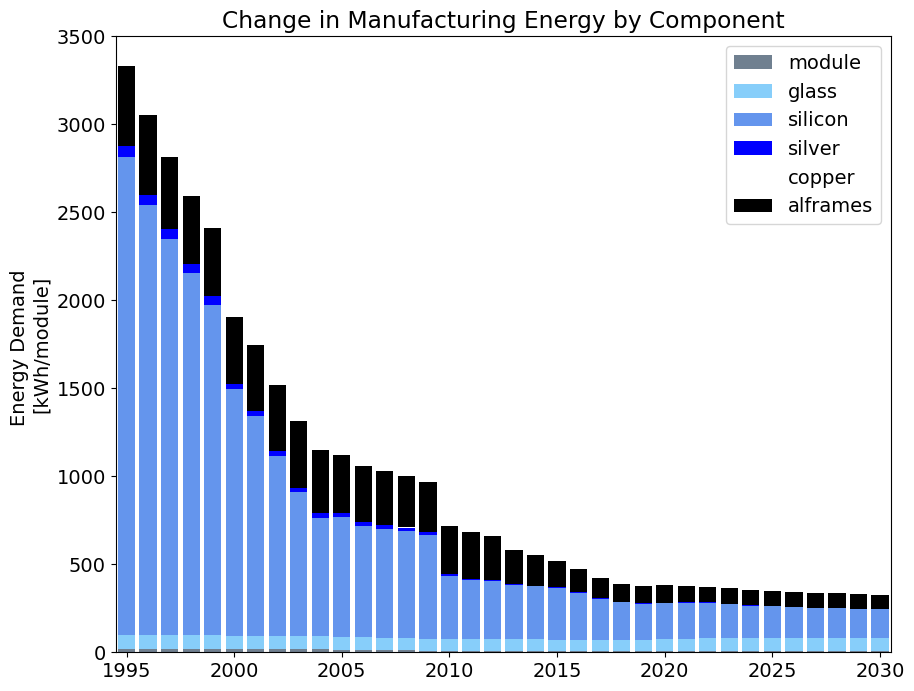

In [13]:
fig, ax = plt.subplots()

#module
ax.bar(e_bkdwn_mod_mat.index, e_bkdwn_mod_mat['module']/1e3, label='module', color='slategray')
#glass
ax.bar(e_bkdwn_mod_mat.index, e_bkdwn_mod_mat['glass']/1e3, label='glass', color = 'lightskyblue',
       bottom=e_bkdwn_mod_mat['module']/1e3)
#silicon
ax.bar(e_bkdwn_mod_mat.index, e_bkdwn_mod_mat['silicon']/1e3, label='silicon', color='cornflowerblue',
       bottom=(e_bkdwn_mod_mat['module']+e_bkdwn_mod_mat['glass'])/1e3)
#silver
ax.bar(e_bkdwn_mod_mat.index, e_bkdwn_mod_mat['silver']/1e3, label='silver', color = 'blue',
       bottom=(e_bkdwn_mod_mat['module']+e_bkdwn_mod_mat['glass']+e_bkdwn_mod_mat['silicon'])/1e3)
#copper
ax.bar(e_bkdwn_mod_mat.index, e_bkdwn_mod_mat['copper']/1e3, label='copper', color = 'white',
       bottom=(e_bkdwn_mod_mat['module']+e_bkdwn_mod_mat['glass']+e_bkdwn_mod_mat['silicon']+e_bkdwn_mod_mat['silver'])/1e3)
#Al frames
ax.bar(e_bkdwn_mod_mat.index, e_bkdwn_mod_mat['alframes']/1e3, label='alframes', color = 'black',
       bottom=(e_bkdwn_mod_mat['module']+e_bkdwn_mod_mat['glass']+e_bkdwn_mod_mat['silicon']+e_bkdwn_mod_mat['silver']+e_bkdwn_mod_mat['copper'])/1e3)


plt.legend()
ax.set_ylabel('Energy Demand \n[kWh/module]')
plt.title('Change in Manufacturing Energy by Component')
plt.rc('font', size=14) #controls default text size
plt.rcParams['figure.figsize'] = (10, 8)
plt.xlim(1994.5,2030.5)
plt.show()